In [ ]:
# Part 1: Imports and Setup

# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm # For progress bars


In [ ]:
# Define a consistent image size for all models
IMG_SIZE = 48


In [ ]:
# Set paths to the raw datasets
EYE_DATA_DIR = os.path.join("..", "data", "raw", "kaggle_drowsiness_dataset")
UTKFACE_DATA_DIR = os.path.join("..", "data", "raw", "UTKFace_dataset")

# Check if the data directories exist before proceeding
if not os.path.exists(EYE_DATA_DIR):
    print(f"Error: Eye dataset directory not found at {EYE_DATA_DIR}")
    print("Please make sure the unzipped folder is in the 'data/raw/' directory.")
if not os.path.exists(UTKFACE_DATA_DIR):
    print(f"Error: UTKFace dataset directory not found at {UTKFACE_DATA_DIR}")
    print("Please make sure the unzipped folder is in the 'data/raw/' directory.")


In [ ]:
# Part 2: Data Preparation for Drowsiness Detection Model

print("--- Processing Drowsiness Data ---")
# list to hold all image data and labels
eye_data = []
# categories (classes) for the drowsiness model
categories = ["Closed_Eyes", "Open_Eyes"]

for category in categories:
    path = os.path.join(EYE_DATA_DIR, category)
    class_num = categories.index(category) # 0 for Closed, 1 for Open
    print(f"Loading images from: {path}")

    # Use tqdm to show a progress bar
    for img_name in tqdm(os.listdir(path)):
        try:
            # Read the image in grayscale to simplify the model
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            # Resize to the consistent image size
            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # Append the resized image and its label to our list
            eye_data.append([resized_array, class_num])
        except Exception as e:
            # Handle potential broken files
            print(f"Skipping file {img_name}: {e}")
            continue

# Shuffle the data to ensure randomness
np.random.shuffle(eye_data)

# Separate features (X) and labels (y)
X_eyes = []
y_eyes = []
for features, label in eye_data:
    X_eyes.append(features)
    y_eyes.append(label)

# Convert to NumPy arrays and normalize pixel values (0-255 -> 0-1)
# Reshape for CNN input: (num_samples, height, width, channels)
X_eyes = np.array(X_eyes).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y_eyes = np.array(y_eyes)

print(f"\nTotal Drowsiness Images Loaded: {len(X_eyes)}")
print(f"Shape of X_eyes: {X_eyes.shape}")
print(f"Shape of y_eyes: {y_eyes.shape}")

# Split the drowsiness data into training and testing sets
X_eyes_train, X_eyes_test, y_eyes_train, y_eyes_test = train_test_split(
    X_eyes, y_eyes, test_size=0.2, random_state=42, stratify=y_eyes
)
print(f"\nShape of X_eyes_train: {X_eyes_train.shape}")
print(f"Shape of X_eyes_test: {X_eyes_test.shape}")

--- Processing Drowsiness Data ---
Loading images from: ..\data\raw\kaggle_drowsiness_dataset\Closed_Eyes


100%|██████████| 2000/2000 [00:15<00:00, 128.65it/s]


Loading images from: ..\data\raw\kaggle_drowsiness_dataset\Open_Eyes


100%|██████████| 2000/2000 [00:14<00:00, 134.01it/s]


Total Drowsiness Images Loaded: 4000
Shape of X_eyes: (4000, 48, 48, 1)
Shape of y_eyes: (4000,)

Shape of X_eyes_train: (3200, 48, 48, 1)
Shape of X_eyes_test: (800, 48, 48, 1)


In [ ]:
# Part 3: Data Preparation for Age Prediction Model

print("\n\n--- Processing UTKFace Data ---")
# list to hold all image data and ages
age_data = []

# Loop through the files in the UTKFace directory
print(f"Loading images from: {UTKFACE_DATA_DIR}")
for img_name in tqdm(os.listdir(UTKFACE_DATA_DIR)):
    try:
        # The filename format is [age]_[gender]_[race]_[date].jpg
        age = int(img_name.split('_')[0])
        
        # Read the image in color (3 channels for age prediction)
        img_array = cv2.imread(os.path.join(UTKFACE_DATA_DIR, img_name))
        
        # Check if the image was loaded correctly
        if img_array is None:
            print(f"Warning: Could not read image {img_name}. Skipping.")
            continue

        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        age_data.append([resized_array, age])
    except Exception as e:
        print(f"Skipping file {img_name}: {e}")
        continue

# Shuffle the data
np.random.shuffle(age_data)

# Separate features (X) and labels (y)
X_age = []
y_age = []
for features, age_label in age_data:
    X_age.append(features)
    y_age.append(age_label)

# Convert to NumPy arrays and normalize pixel values
X_age = np.array(X_age) / 255.0
y_age = np.array(y_age)

print(f"\nTotal UTKFace Images Loaded: {len(X_age)}")
print(f"Shape of X_age: {X_age.shape}")
print(f"Shape of y_age: {y_age.shape}")

# Split the age data into training and testing sets
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(
    X_age, y_age, test_size=0.2, random_state=42
)
print(f"\nShape of X_age_train: {X_age_train.shape}")
print(f"Shape of X_age_test: {X_age_test.shape}")



--- Processing UTKFace Data ---
Loading images from: ..\data\raw\UTKFace_dataset


100%|██████████| 23708/23708 [02:57<00:00, 133.22it/s]



Total UTKFace Images Loaded: 23708
Shape of X_age: (23708, 48, 48, 3)
Shape of y_age: (23708,)

Shape of X_age_train: (18966, 48, 48, 3)
Shape of X_age_test: (4742, 48, 48, 3)


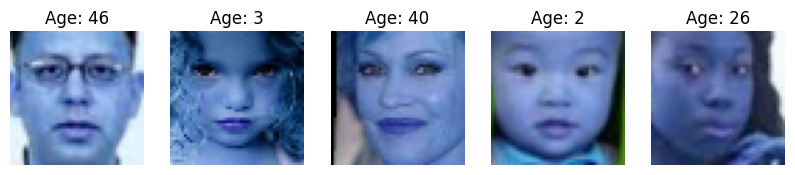

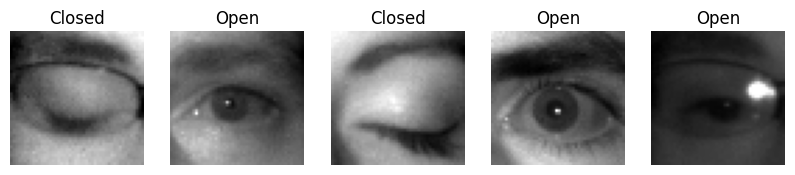

In [ ]:

# visualize a few images to confirm everything is correct.
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_age[i])
    plt.title(f"Age: {y_age[i]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # The eye images are grayscale, so use cmap='gray'
    plt.imshow(X_eyes[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    title = "Open" if y_eyes[i] == 1 else "Closed"
    plt.title(title)
    plt.axis('off')
plt.show()


In [9]:
# Part 4: Building and Training the Drowsiness Detection Model

# Import Keras layers and models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("\n\n--- Building Drowsiness Detection Model ---")
# Define the CNN architecture for drowsiness detection
drowsiness_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout to prevent overfitting
    Dense(1, activation='sigmoid') # Sigmoid for binary classification (Open/Closed)
])

# Display the model summary
drowsiness_model.summary()

# Compile the model
drowsiness_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("\nTraining Drowsiness Model...")
drowsiness_history = drowsiness_model.fit(
    X_eyes_train, 
    y_eyes_train,
    epochs=20, # Number of training epochs
    validation_data=(X_eyes_test, y_eyes_test),
    batch_size=32,
    verbose=1
)

# Save the trained model weights
drowsiness_model.save_weights(os.path.join("..", "src", "models", "drowsiness_model.weights.h5"))
print("\nDrowsiness model weights saved successfully!")




--- Building Drowsiness Detection Model ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,073 (1.35 MB)

 Trainable params: 355,073 (1.35 MB)

 Non-trainable params: 0 (0.00 B)


Training Drowsiness Model...
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8597 - loss: 0.2857 - val_accuracy: 0.9787 - val_loss: 0.0684
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9803 - loss: 0.0583 - val_accuracy: 0.9887 - val_loss: 0.0328
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9987 - val_loss: 0.0079
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9966 - loss: 0.0170 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9937 - val_loss: 0.0120
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9981 - loss: 0.0089 - val_accuracy: 0.9975 - val_loss: 0.0038
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.

In [ ]:
# Part 5: Building and Training the Age Prediction Model

print("\n\n--- Building Age Prediction Model ---")
# Define the CNN architecture for age prediction
age_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5), # Add dropout
    Dense(1, activation='linear') # Linear activation for regression
])

# Display the model summary
age_model.summary()

# Compile the model
age_model.compile(
    optimizer='adam',
    loss='mean_squared_error', # Use MSE for regression problems
    metrics=['mae']
)

# Train the model
print("\nTraining Age Prediction Model...")
age_history = age_model.fit(
    X_age_train, 
    y_age_train,
    epochs=30, # Training for more epochs for better age prediction
    validation_data=(X_age_test, y_age_test),
    batch_size=64,
    verbose=1
)

# Save the trained model weights
age_model.save_weights(os.path.join("..", "src", "models", "age_model.weights.h5"))
print("\nAge prediction model weights saved successfully!")




--- Building Age Prediction Model ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,049 (2.36 MB)

 Trainable params: 618,049 (2.36 MB)

 Non-trainable params: 0 (0.00 B)


Training Age Prediction Model...
Epoch 1/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 445.3710 - mae: 16.2263 - val_loss: 362.2023 - val_mae: 15.6190
Epoch 2/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 277.5281 - mae: 12.7729 - val_loss: 235.6983 - val_mae: 11.2106
Epoch 3/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 228.1989 - mae: 11.4534 - val_loss: 197.0738 - val_mae: 10.2046
Epoch 4/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 194.6433 - mae: 10.5047 - val_loss: 174.9415 - val_mae: 10.2865
Epoch 5/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 159.5904 - mae: 9.4907 - val_loss: 135.1869 - val_mae: 8.7301
Epoch 6/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 147.4030 - mae: 9.1106 - val_loss: 124.0547 - val_mae: 8.1598
Epoch 7/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 132.0459 - mae: 8.6154 - val_loss: 113.6825 - val_mae: 7.9517
Epoch 8/30
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 124.0303 - mae: 8.3674 - val_loss: 1

In [11]:
# Part 6: Model Evaluation and Metrics

print("\n\n--- Evaluating Drowsiness Detection Model ---")
# Import metrics from scikit-learn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Make predictions on the test set
y_eyes_pred = drowsiness_model.predict(X_eyes_test)

# Convert probabilities to binary classes (0 or 1)
y_eyes_pred_classes = (y_eyes_pred > 0.5).astype(int)

# Calculate and print metrics
print(f"Accuracy: {accuracy_score(y_eyes_test, y_eyes_pred_classes):.4f}")
print(f"Precision: {precision_score(y_eyes_test, y_eyes_pred_classes):.4f}")
print(f"Recall: {recall_score(y_eyes_test, y_eyes_pred_classes):.4f}")

# Generate and display the confusion matrix
cm_eyes = confusion_matrix(y_eyes_test, y_eyes_pred_classes)
print("\nConfusion Matrix:")
print(cm_eyes)



--- Evaluating Drowsiness Detection Model ---
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Confusion Matrix:
[[400   0]
 [  0 400]]


In [13]:
print("\n\n--- Evaluating Age Prediction Model ---")
# Import Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Make predictions on the age test set
y_age_pred = age_model.predict(X_age_test)

# Calculate and print Mean Absolute Error
mae_age = mean_absolute_error(y_age_test, y_age_pred)
print(f"Mean Absolute Error (MAE): {mae_age:.2f} years")

# You can also print some example predictions to see how well it's doing
print("\nExample Age Predictions:")
for i in range(5):
    actual_age = y_age_test[i]
    predicted_age = y_age_pred[i][0]
    print(f"Actual Age: {actual_age:d}, Predicted Age: {predicted_age:.2f}")



--- Evaluating Age Prediction Model ---
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Absolute Error (MAE): 6.99 years

Example Age Predictions:
Actual Age: 32, Predicted Age: 43.64
Actual Age: 41, Predicted Age: 31.01
Actual Age: 26, Predicted Age: 26.89
Actual Age: 24, Predicted Age: 24.99
Actual Age: 74, Predicted Age: 72.58
